In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf1 = tf.compat.v1
print(tf.__version__)

2.6.0


In [2]:
file_path = 'air-quality-dataset/_DISTRICT-ALL/hcm.csv"'
Data = pd.read_csv(file_path)
data.head(24)

FileNotFoundError: [Errno 2] No such file or directory: 'air-quality-dataset/_DISTRICT-ALL/hcm.csv"'

In [25]:
temperature = np.array(data['Temperature'])
num_periods = 24
f_horizon = 1
x_data = temperature[:(len(temperature)-(num_periods*2))]
x_batches = x_data.reshape(-1, num_periods, 1)

y_data = temperature[1:(len(temperature)-(num_periods*2))+f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)
print(y_batches.shape)

(20, 24, 1)


In [26]:
def test_data(series, forecast, num):
    testX = temperature[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = temperature[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X_test, Y_test = test_data(temperature, f_horizon, 24*2)
print(X_test.shape)


(2, 24, 1)


In [47]:
tf1.reset_default_graph()
inputs = 1
rnn_size = 100
output = 1
learning_rate=0.001
dropout_keep_prob = tf1.placeholder(tf.float32)

X = tf1.placeholder(tf.float32, [None, num_periods, 1])
Y = tf1.placeholder(tf.float32, [None, num_periods, 1])

rnn_cells=tf1.nn.rnn_cell.BasicRNNCell(num_units=rnn_size, activation=tf.nn.relu)
rnn_output, states = tf1.nn.dynamic_rnn(rnn_cells, X, dtype=tf.float32)


output=tf.reshape(rnn_output, [-1, rnn_size])
logit=tf1.layers.dense(output, 1, name="softmax")

outputs=tf.reshape(logit, [-1, num_periods, 1])
print(logit)

loss = tf.reduce_sum(tf.square(outputs - Y))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logit, 1), tf.cast(Y, tf.int64)), tf.float32))

optimizer = tf1.train.AdamOptimizer(learning_rate=learning_rate)
train_step=optimizer.minimize(loss)

init=tf1.global_variables_initializer()

Tensor("softmax/BiasAdd:0", shape=(?, 1), dtype=float32)


In [51]:
epochs = 1000

sess = tf1.Session()
init = tf1.global_variables_initializer()
sess.run(init)
saver = tf1.train.Saver()

for epoch in range(epochs):
    train_dict = {X: x_batches, Y: y_batches, dropout_keep_prob:0.5}
    sess.run(train_step, feed_dict=train_dict)
y_pred=sess.run(outputs, feed_dict={X: X_test})
save_path = saver.save(sess, "models-ipynb/weather.ckpt")

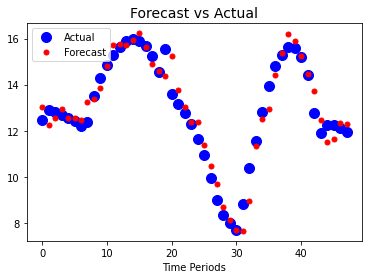

In [52]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()

In [55]:
with tf1.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "models-ipynb/weather.ckpt")
    predict=sess.run(outputs, feed_dict={X: X_test})
print(predict)

INFO:tensorflow:Restoring parameters from models/weather.ckpt
[[[13.031424 ]
  [12.237221 ]
  [12.548517 ]
  [12.955475 ]
  [12.539894 ]
  [12.530054 ]
  [12.447479 ]
  [13.251837 ]
  [13.365641 ]
  [13.832832 ]
  [14.824065 ]
  [15.696954 ]
  [15.772193 ]
  [15.706718 ]
  [15.918512 ]
  [16.228167 ]
  [15.627855 ]
  [14.884585 ]
  [14.585774 ]
  [14.379441 ]
  [15.229434 ]
  [13.763757 ]
  [13.022189 ]
  [12.369569 ]]

 [[12.363588 ]
  [11.388538 ]
  [10.484026 ]
  [ 9.693047 ]
  [ 8.6754465]
  [ 8.122439 ]
  [ 7.701366 ]
  [ 7.651708 ]
  [ 8.969744 ]
  [11.343524 ]
  [12.524049 ]
  [12.946082 ]
  [14.406647 ]
  [15.356552 ]
  [16.21219  ]
  [15.871886 ]
  [15.225169 ]
  [14.45426  ]
  [13.715751 ]
  [12.485258 ]
  [11.490541 ]
  [11.648749 ]
  [12.354181 ]
  [12.305129 ]]]


In [56]:
print(y_pred)

[[[13.031424 ]
  [12.237221 ]
  [12.548517 ]
  [12.955475 ]
  [12.539894 ]
  [12.530054 ]
  [12.447479 ]
  [13.251837 ]
  [13.365641 ]
  [13.832832 ]
  [14.824065 ]
  [15.696954 ]
  [15.772193 ]
  [15.706718 ]
  [15.918512 ]
  [16.228167 ]
  [15.627855 ]
  [14.884585 ]
  [14.585774 ]
  [14.379441 ]
  [15.229434 ]
  [13.763757 ]
  [13.022189 ]
  [12.369569 ]]

 [[12.363588 ]
  [11.388538 ]
  [10.484026 ]
  [ 9.693047 ]
  [ 8.6754465]
  [ 8.122439 ]
  [ 7.701366 ]
  [ 7.651708 ]
  [ 8.969744 ]
  [11.343524 ]
  [12.524049 ]
  [12.946082 ]
  [14.406647 ]
  [15.356552 ]
  [16.21219  ]
  [15.871886 ]
  [15.225169 ]
  [14.45426  ]
  [13.715751 ]
  [12.485258 ]
  [11.490541 ]
  [11.648749 ]
  [12.354181 ]
  [12.305129 ]]]
